# LR Assignment: (Bike-Sharing System)

In [141]:
# IMPORTING

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [142]:
# Step 1: Understanding the Data

bike_dataframe= pd.read_csv("day.csv")
bike_dataframe.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,1,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,2,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,3,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [143]:
bike_dataframe.shape

(730, 16)

In [144]:
bike_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [145]:
bike_dataframe.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<Axes: >

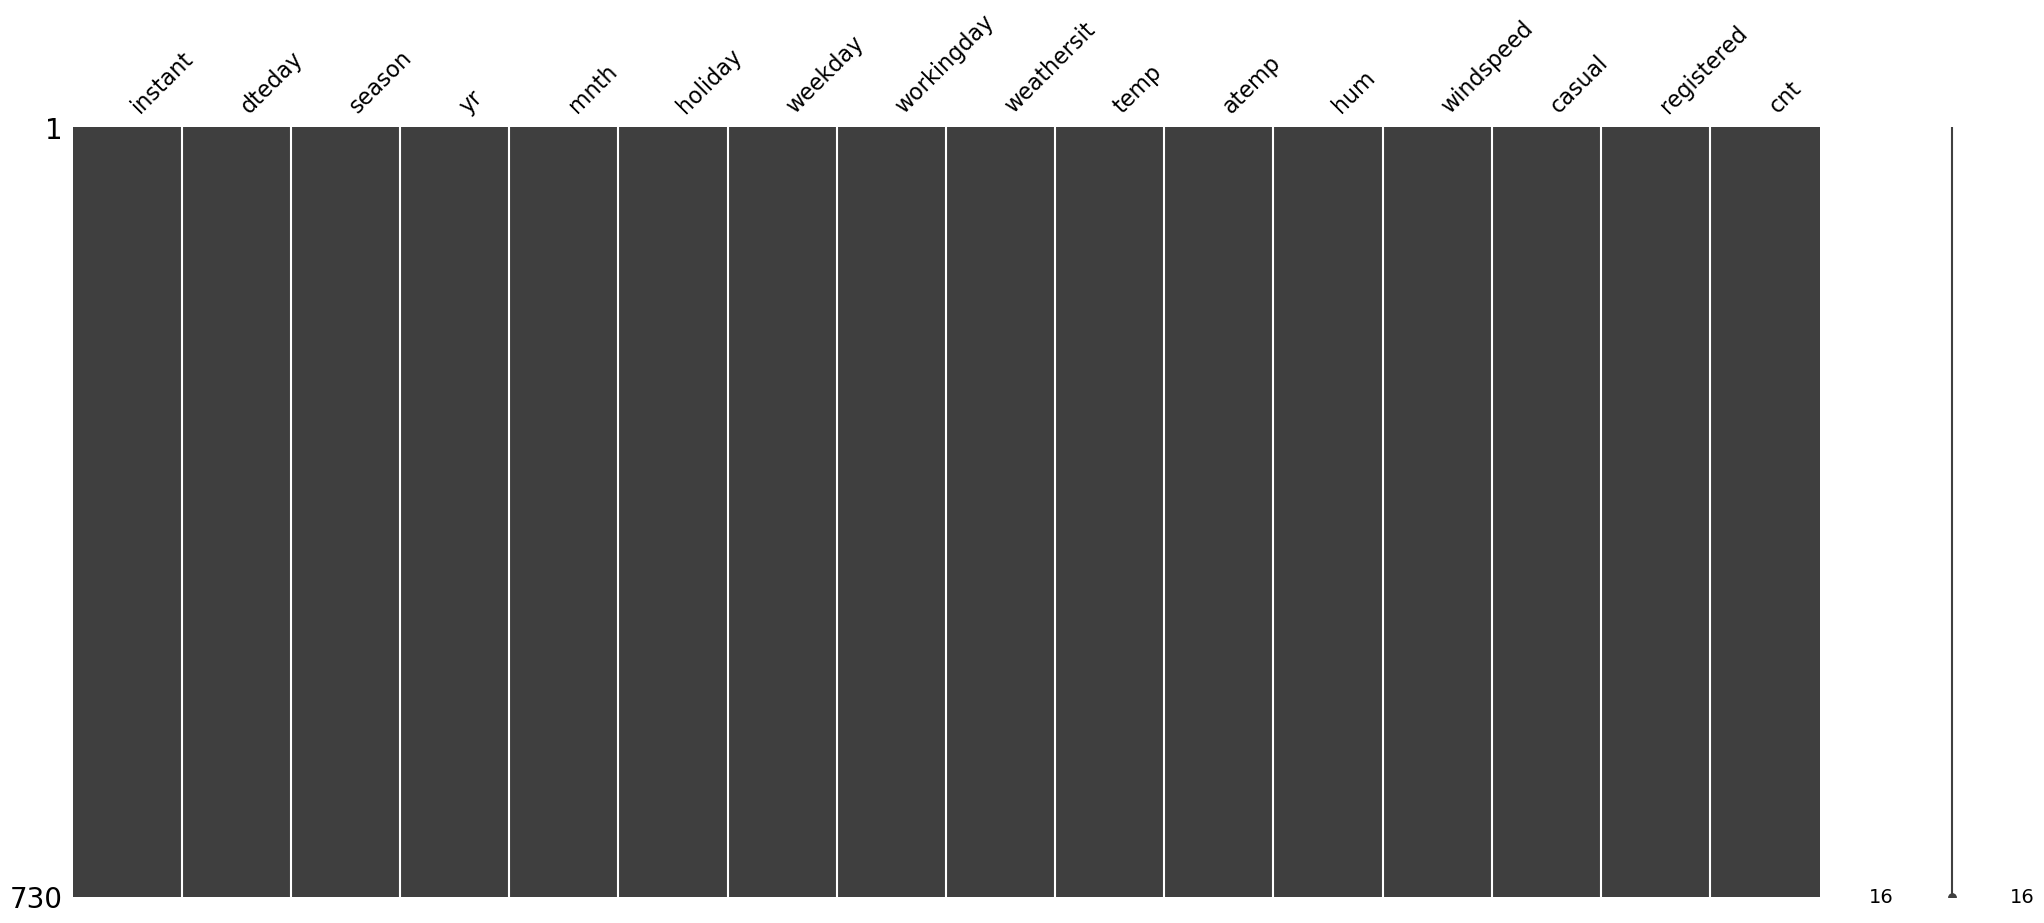

In [146]:
# Searching for null values:
import missingno as mn
mn.matrix(bike_dataframe)

In [147]:
bike_dataframe['dteday'].dtype

dtype('O')

In [148]:
# converting datatype of dteday column to datetime format:
bike_dataframe['dteday'] =  pd.to_datetime(bike_dataframe['dteday'],format='%d-%m-%Y')
bike_dataframe['dteday'].dtype

dtype('<M8[ns]')

In [149]:
bike_dataframe['year'] = pd.DatetimeIndex(bike_dataframe['dteday']).year
bike_dataframe['month'] = pd.DatetimeIndex(bike_dataframe['dteday']).month

In [150]:
bike_dataframe.head(7)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1
5,6,2018-01-06,1,0,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,2018,1
6,7,2018-01-07,1,0,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510,2018,1


In [151]:
bike_dataframe.drop(['yr','mnth'],axis=1,inplace=True)

In [152]:
bike_dataframe.head(7)

,instant,dteday,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1
5,6,2018-01-06,1,0,6,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606,2018,1
6,7,2018-01-07,1,0,0,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510,2018,1


In [153]:
bike_dataframe.drop('holiday',axis=1,inplace=True)

In [154]:
bike_dataframe.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)
bike_dataframe.head(7)

,season,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1
5,1,6,0,1,8.378268,11.66045,51.8261,6.000868,1606,2018,1
6,1,0,0,2,8.057402,10.44195,49.8696,11.304642,1510,2018,1


In [155]:
# Renaming columns for easy understanding:
bike_dataframe.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)
bike_dataframe.head(7)

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,1,1,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,2,1,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1
5,1,6,0,1,8.378268,11.66045,51.8261,6.000868,1606,2018,1
6,1,0,0,2,8.057402,10.44195,49.8696,11.304642,1510,2018,1


In [156]:
# Step 2: Encoding the data values:

# Season conversion form no. to season names:
codes = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike_dataframe['season'] = bike_dataframe['season'].map(codes)


In [157]:
# Step 2.a: Data Visualization

<Axes: xlabel='season', ylabel='count'>

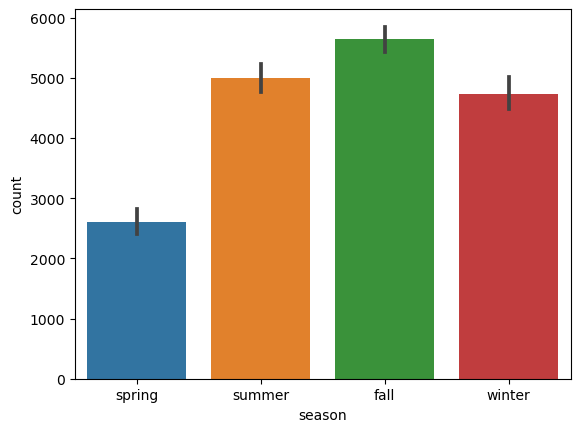

In [158]:
sns.barplot(data=bike_dataframe, x='season', y='count')

In [159]:
# 2) weather mapping with nos. :
'''
1: Clear
2: Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered cloud
4: Heavy Rain
'''
codes = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike_dataframe['weathersit'] = bike_dataframe['weathersit'].map(codes)

<Axes: xlabel='weathersit', ylabel='count'>

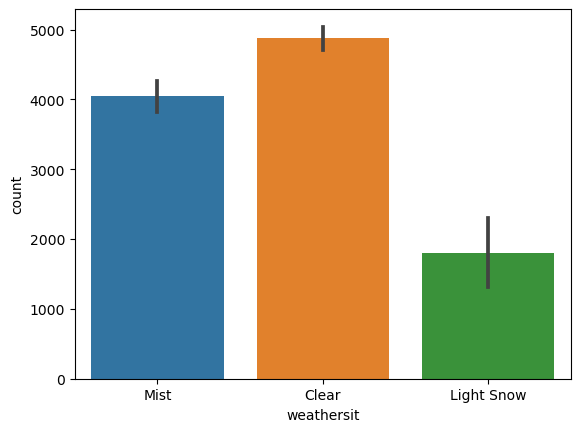

In [160]:
sns.barplot(data=bike_dataframe, x='weathersit', y='count')

<Axes: xlabel='workingday', ylabel='count'>

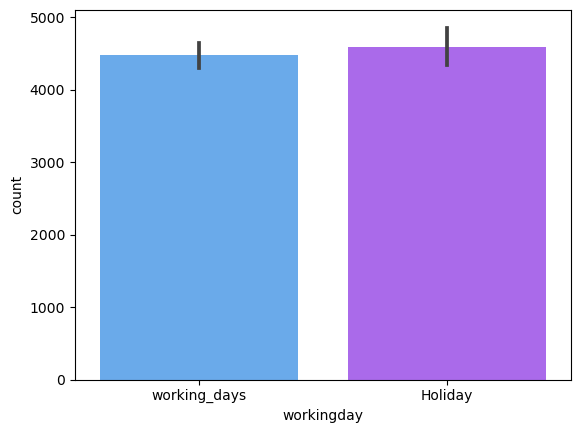

In [161]:
# If Working days is neither weekend nor holiday is 1, otherwise is 0:

codes = {1:'working_days',0:'Holiday'}
bike_dataframe['workingday'] = bike_dataframe['workingday'].map(codes)

sns.barplot(data=bike_dataframe, x= 'workingday', y= 'count',palette='cool')

In [162]:
# Year mapping for 2018 to 0, for 2019 to 1:
codes = {2019:1,2018:0}
bike_dataframe['year'] = bike_dataframe['year'].map(codes)


<Axes: xlabel='year', ylabel='count'>

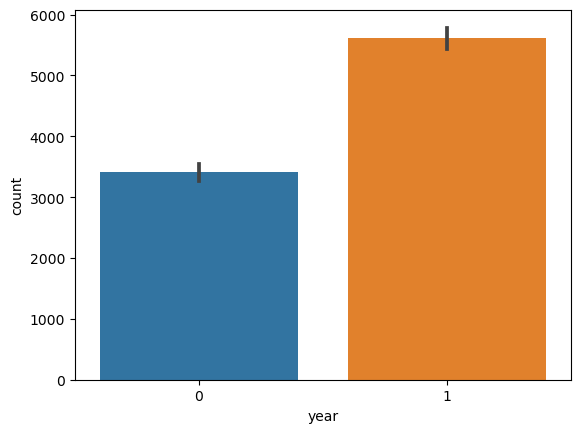

In [163]:
sns.barplot(data=bike_dataframe, x='year', y='count')

In [164]:
# Month mapping with no. to name of months:
codes = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_dataframe['month'] = bike_dataframe['month'].map(codes)


<Axes: xlabel='month', ylabel='count'>

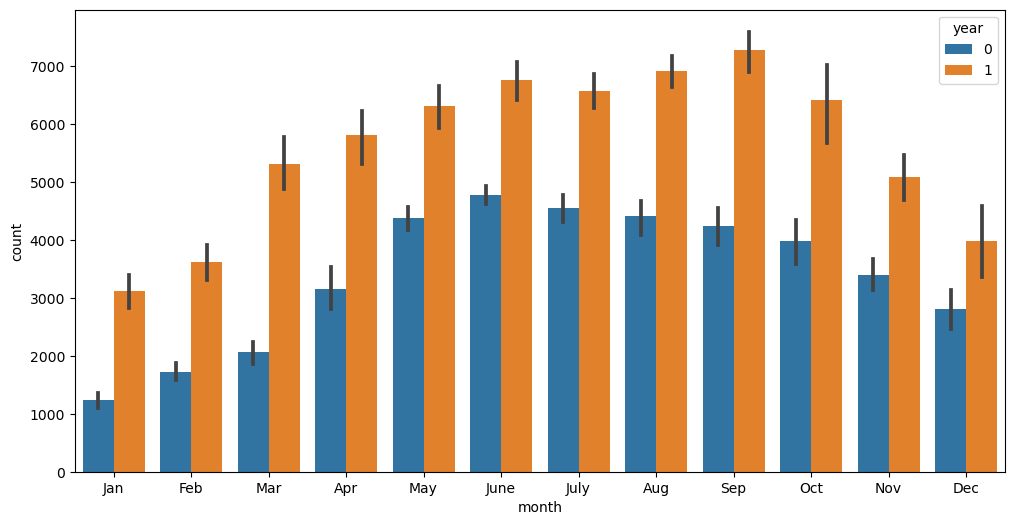

In [165]:
plt.figure(figsize=(12,6))
sns.barplot(data=bike_dataframe,x='month',y='count',hue='year')

In [166]:
# Weekdays mapping with no. to name of weekdays:
codes = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_dataframe['weekday'] = bike_dataframe['weekday'].map(codes)


<Axes: xlabel='weekday'>

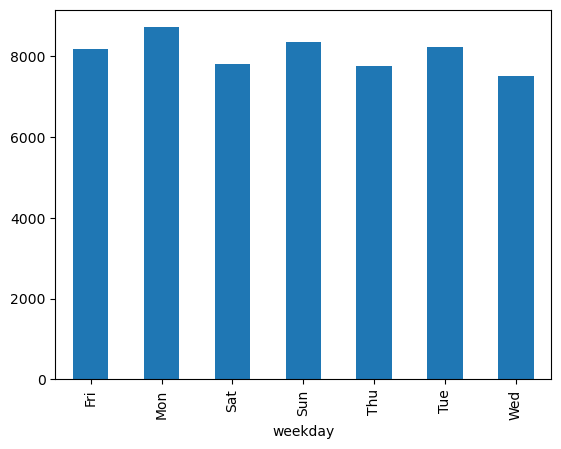

In [167]:
bike_dataframe.groupby('weekday')['count'].max().plot(kind='bar')

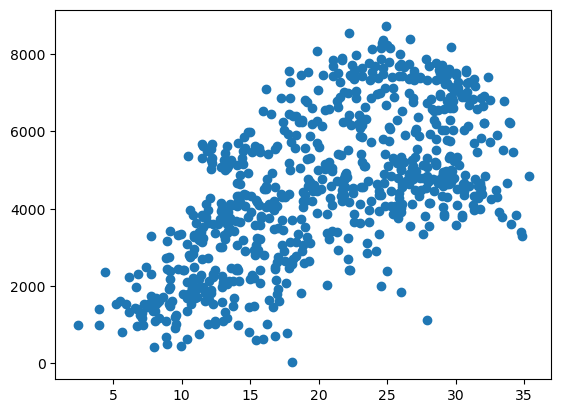

In [168]:
# temp vs count scatterplot:
plt.scatter(data=bike_dataframe,x='temp',y='count')

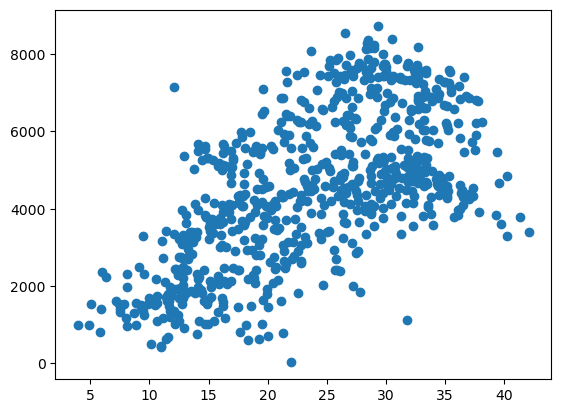

In [169]:
# atemp vs count scatterplot:
plt.scatter(data=bike_dataframe,x='atemp',y='count')

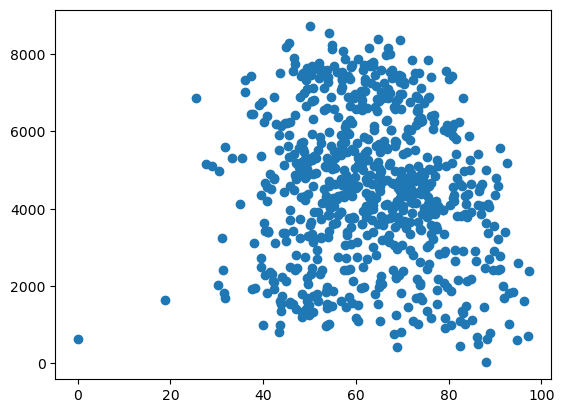

In [170]:
# Humidity vs count scatterplot:
plt.scatter(data=bike_dataframe,x='humidity',y='count')

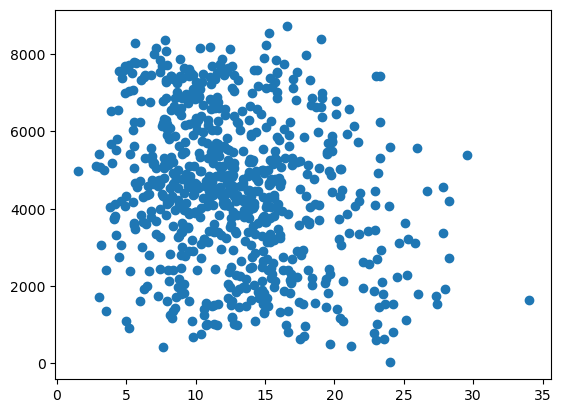

In [171]:
# Windspeed vs count scatterplot:
plt.scatter(data=bike_dataframe,x='windspeed',y='count')

<Axes: xlabel='count', ylabel='Density'>

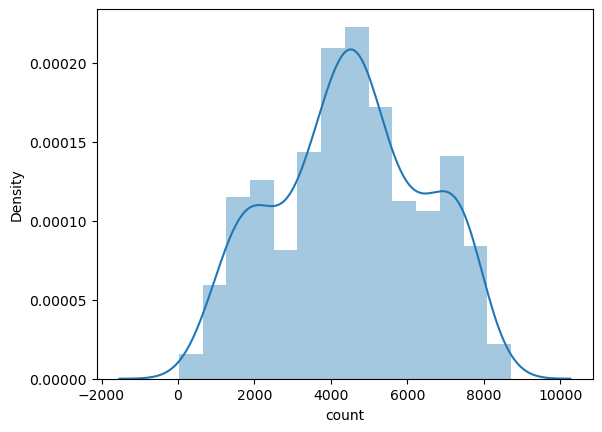

In [172]:
sns.distplot(bike_dataframe['count'])

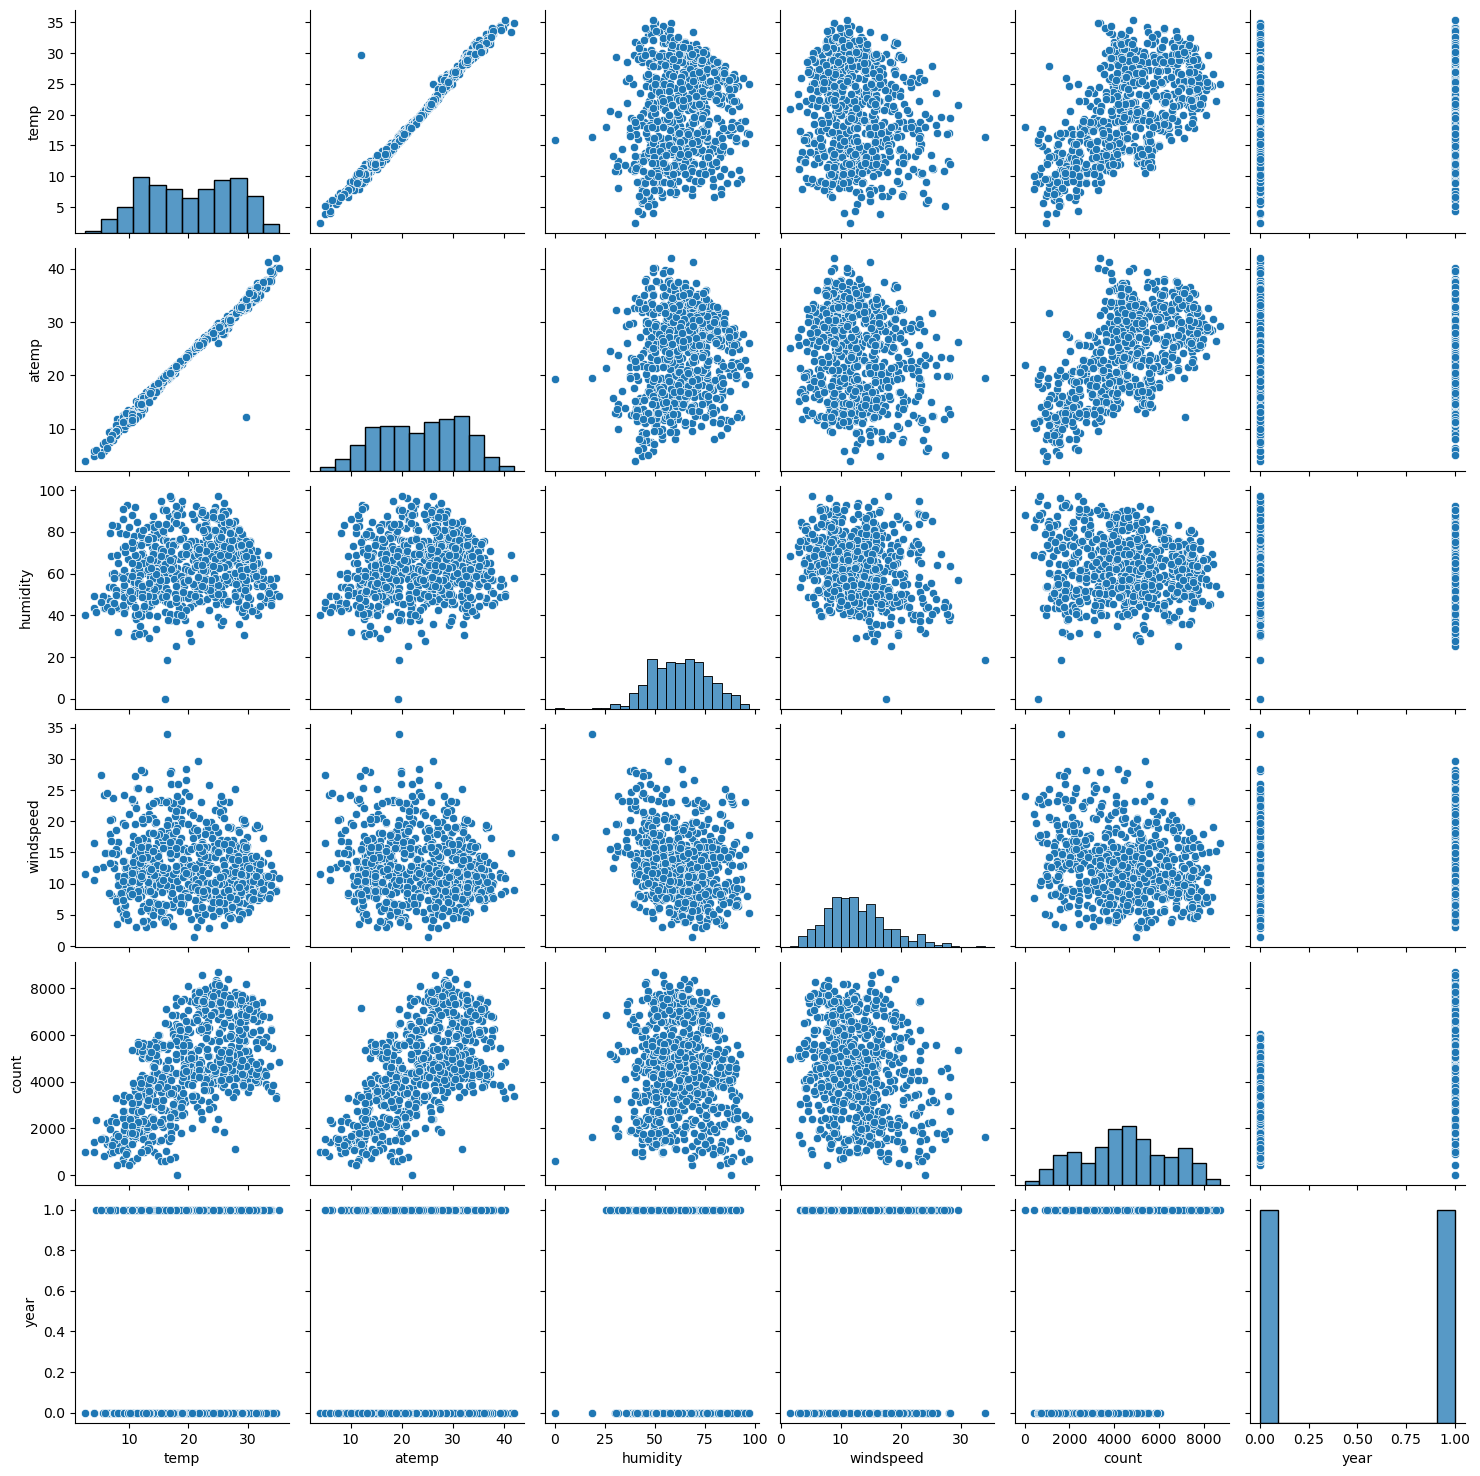

In [173]:
# Step 3: Finding Relationships between variables:
sns.pairplot(bike_dataframe)

<Axes: >

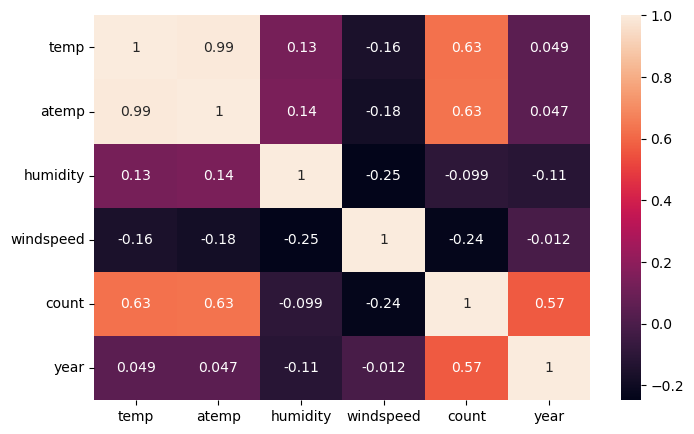

In [177]:
plt.figure(figsize = (8,5))
sns.heatmap(bike_dataframe.corr(),annot=True)

<Axes: >

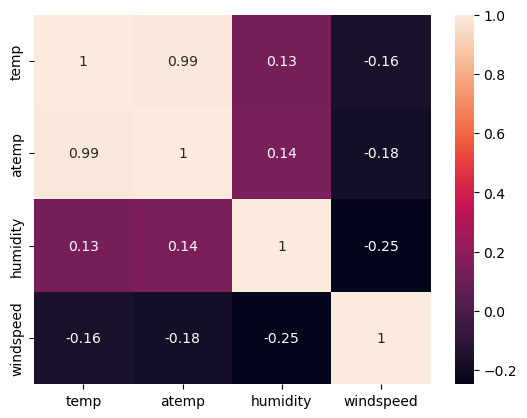

In [178]:
data= bike_dataframe[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)

In [179]:
bike_dataframe.drop('atemp',axis=1,inplace=True)
bike_dataframe.head(7)

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Tue,working_days,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Wed,working_days,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Thu,working_days,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Fri,working_days,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Sat,working_days,Clear,9.305237,43.6957,12.522300,1600,0,Jan
5,spring,Sun,Holiday,Clear,8.378268,51.8261,6.000868,1606,0,Jan
6,spring,Mon,Holiday,Mist,8.057402,49.8696,11.304642,1510,0,Jan


In [180]:
# Step 4 : Handling Categorical Variables
season = pd.get_dummies(bike_dataframe['season'],drop_first=True)

working_days = pd.get_dummies(bike_dataframe['workingday'],drop_first=True)

weather= pd.get_dummies(bike_dataframe['weathersit'],drop_first=True)

month= pd.get_dummies(bike_dataframe['month'],drop_first=True)

week_day= pd.get_dummies(bike_dataframe['weekday'],drop_first=True)

In [181]:
bike_dataframe= pd.concat([bike_dataframe,season,working_days,weather,month,week_day],axis=1)
bike_dataframe.head(7)

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Tue,working_days,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,0,0,1,0
1,spring,Wed,working_days,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,0,0,0,0,0,1
2,spring,Thu,working_days,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,1,0,0
3,spring,Fri,working_days,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,0
4,spring,Sat,working_days,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,1,0,0,0,0
5,spring,Sun,Holiday,Clear,8.378268,51.8261,6.000868,1606,0,Jan,...,0,0,0,0,0,0,1,0,0,0
6,spring,Mon,Holiday,Mist,8.057402,49.8696,11.304642,1510,0,Jan,...,0,0,0,0,1,0,0,0,0,0


In [182]:
bike_dataframe.drop(['season','workingday','weathersit','weekday','month'], axis=1,inplace=True)
bike_dataframe.head(7)

,temp,humidity,windspeed,count,year,spring,summer,winter,working_days,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
5,8.378268,51.8261,6.000868,1606,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
6,8.057402,49.8696,11.304642,1510,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [183]:
# Step 5: Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

np.random.seed(0)
x_train_0, y_test_0 = train_test_split(bike_dataframe, train_size = 0.7, test_size = 0.3, random_state = 100)

In [184]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [185]:
# Apply scaler() to all the columns except the'dummy' variables.

numerical_var=['temp','humidity','windspeed','count']

x_train_0[numerical_var]= scaler.fit_transform(x_train_0[numerical_var])

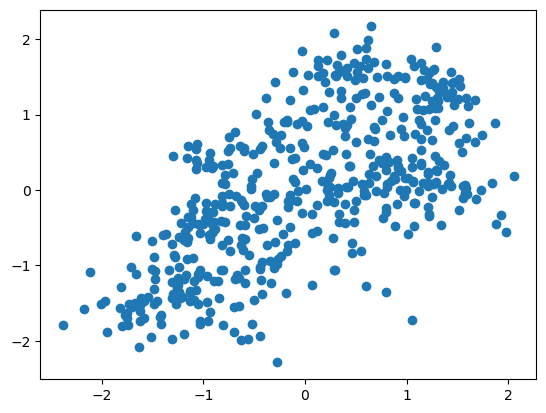

In [186]:
plt.scatter('temp','count',data=x_train_0)

In [187]:
Y_train = x_train_0.pop('count')
X_train = x_train_0

In [188]:
# Step 6: Building a linear model


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [189]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, Y_train)


LinearRegression()

In [190]:
 # running RFE
rfe = RFE(lm,step = 12)
rfe = rfe.fit(X_train, Y_train)

In [191]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 3),
 ('windspeed', False, 3),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('working_days', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 3),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', False, 3),
 ('June', False, 3),
 ('Mar', False, 3),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 3),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 3),
 ('Sun', True, 1),
 ('Thu', False, 3),
 ('Tue', False, 3),
 ('Wed', False, 3)]

In [192]:
all_colum = X_train.columns[rfe.support_]
all_colum

Index(['temp', 'year', 'spring', 'winter', 'working_days', 'Light Snow',
       'Mist', 'Dec', 'Jan', 'Nov', 'Sep', 'Mon', 'Sun'],
      dtype='object')

In [193]:
# Creating X_test dataframe with RFE selected variables
X_trainRFE = X_train[all_colum]

In [194]:
import statsmodels.api as sm  

# Adding a constant variable 
X_trainRFE = sm.add_constant(X_trainRFE)

lm = sm.OLS(Y_train,X_trainRFE).fit()

In [195]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     176.7
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          1.41e-176
Time:                        22:23:32   Log-Likelihood:                -282.99
No. Observations:                 510   AIC:                             594.0
Df Residuals:                     496   BIC:                             653.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.6751      0.138     -4.906      0.000      -0.945      -0.405
temp             0.3928      0.031     12.502      0.000       0.331       0.454
year             1.0486      0.038     27.438      0.000       0.974       1.124
spring          -0.4963      0.073     -6.808      0.000      -0.640      -0.353
winter           0.3410      0.066      5.184      0.000       0.212       0.470
working_days     0.3558      0.132      2.697      0.007       0.097       0.615
Light Snow      -1.3831      0.115    -12.043      0.000      -1.609      -1.157
Mist            -0.3498      0.041     -8.574      0.000      -0.430      -0.270
Dec             -0.2070      0.081     -2.555      0.011      -0.366      -0.048
Jan             -0.2000      0.084     -2.388      0.017      -0.365      -0.035
Nov             -0.2569      0.087     -2.937      0.003      -0.429      -0.085
Sep              0.3177      0.072      4.404      0.000       0.176       0.459
Mon              0.4412      0.140      3.154      0.002       0.166       0.716
Sun              0.4399      0.140      3.136      0.002       0.164       0.715
==============================================================================
Omnibus:                       87.857   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.471
Skew:                          -0.847   Prob(JB):                     4.48e-52
Kurtosis:                       5.874   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [196]:
# Dropping Mon as it is insignificant:
X_train_1= X_trainRFE.drop('Mon',1)

X_train_2= sm.add_constant(X_train_1)
lm1 = sm.OLS(Y_train,X_train_2).fit()

In [197]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     187.2
Date:                Thu, 06 Apr 2023   Prob (F-statistic):          1.36e-175
Time:                        22:23:34   Log-Likelihood:                -288.05
No. Observations:                 510   AIC:                             602.1
Df Residuals:                     497   BIC:                             657.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.2886      0.063     -4.571      0.000      -0.413      -0.165
temp             0.3917      0.032     12.356      0.000       0.329       0.454
year             1.0479      0.039     27.175      0.000       0.972       1.124
spring          -0.5094      0.073     -6.937      0.000      -0.654      -0.365
winter           0.3391      0.066      5.110      0.000       0.209       0.470
working_days    -0.0255      0.053     -0.479      0.632      -0.130       0.079
Light Snow      -1.3766      0.116    -11.882      0.000      -1.604      -1.149
Mist            -0.3434      0.041     -8.353      0.000      -0.424      -0.263
Dec             -0.2078      0.082     -2.542      0.011      -0.368      -0.047
Jan             -0.2051      0.085     -2.427      0.016      -0.371      -0.039
Nov             -0.2760      0.088     -3.136      0.002      -0.449      -0.103
Sep              0.3014      0.073      4.151      0.000       0.159       0.444
Sun              0.0584      0.072      0.815      0.416      -0.082       0.199
==============================================================================
Omnibus:                       86.929   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.063
Skew:                          -0.832   Prob(JB):                     2.02e-52
Kurtosis:                       5.904   Cond. No.                         9.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [198]:
X_train3= X_train_2.drop('const',axis=1)

In [199]:
# Variance Inflation Factor(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
X = X_train3
vif_df['Features'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_df['VIF'] = round(vif_df['VIF'], 2)
vif_df = vif_df.sort_values(by = "VIF", ascending = False)
vif_df

,Features,VIF
2,spring,2.99
3,winter,2.80
4,working_days,2.66
0,temp,2.43
1,year,1.87
9,Nov,1.82
8,Jan,1.72
7,Dec,1.52
6,Mist,1.46
11,Sun,1.33


Text(0.5, 0, 'Errors values')

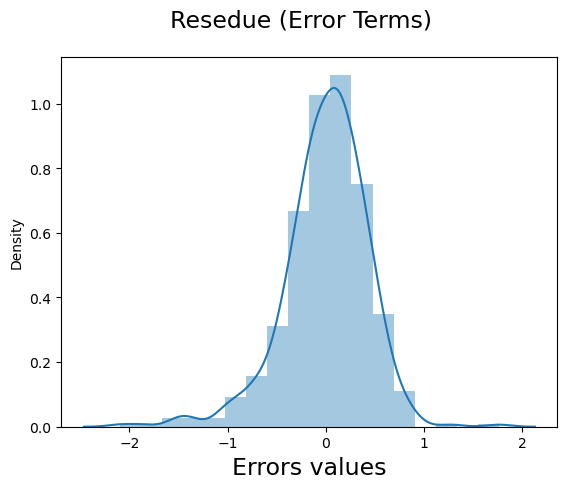

In [201]:
# Step 7: Residual Analysis of the train data
Y_train_pred = lm1.predict(X_train_2)

fig = plt.figure()
sns.distplot((Y_train - Y_train_pred), bins = 18)
fig.suptitle('Resedue (Error Terms)', fontsize = 17)                  # Plot heading 
plt.xlabel('Errors values', fontsize = 17)

In [202]:
# Step 8: Making Predictions:

numerical_var=['temp','humidity','windspeed','count']
y_test_0[numerical_var]= scaler.transform(y_test_0[numerical_var])

In [206]:
# Dividing into X_test and y_test:
y_test = y_test_0.pop('count')
X_test = y_test_0

KeyError: 'count'

In [ ]:
# Using model for prediction:

# Creating X_test_new dataframe by dropping variables from X_test:
X_test_new = X_test[X_train3.columns]

# adding constant variable to line equation:
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Predicting test values:
y_test_pred = lm1.predict(X_test_new)

In [ ]:
# Step 9: Evaluating Model:
# Comparing the y_test and y_pred variables:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=28)              
plt.xlabel('Actual Values', fontsize=15)                               
plt.ylabel('Predictions Values', fontsize=15)                           

In [ ]:

from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

#### Outcome:

Below are the 5 most effecting variables that can be used to benifit the bike rental count:
Spring season, Temperature, Mist, Sun & Working days.

## THANK YOU ##